In [1]:
import splusdata

In [2]:
conn = splusdata.connect('Luis', 'plutarco*80') ## from splus.cloud

You have access to internal data


In [3]:
conn.get_tap_tables()


Tables and columns info at https://splus.cloud/


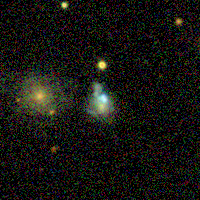

In [4]:
conn.get_img(43.3559, -0.2322, 200, R="I", G="R", B="G", stretch=0.5, Q=5)

In [5]:
#conn.get_cut(0.4, 0.7, 1500, 'R') ## image FITS cuts - RA, DEC, Radius, band

In [6]:
#conn.get_field('STRIPE82-0002', 'R') ## Field image FITS - Field, band

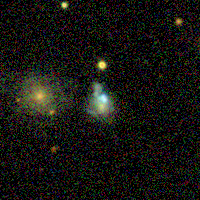

In [7]:
conn.get_last_result() ## Returns result of the last operation made

In [8]:
conn.query('select TOP 20001 id, ra, dec from idr3.detection_image where ra + dec > 200') ## async query on splus.cloud

finished


ID,RA,DEC
bytes24,float64,float64
iDR3.SPLUS-s02s10.044376,336.5392208416257,-0.9932475598746908
iDR3.SPLUS-s02s10.044377,336.9439089544132,-0.9764020887881039
iDR3.SPLUS-s02s10.044378,337.06335017735205,-0.9764155174032986
iDR3.SPLUS-s02s10.044379,337.0839445232194,-0.9788145426511597
iDR3.SPLUS-s02s10.044380,336.7140818944004,-0.9975745681443569
iDR3.SPLUS-s02s10.044381,336.717272840827,-0.9981201322659254
iDR3.SPLUS-s02s10.044382,336.1996208986507,-0.9976040457286175
iDR3.SPLUS-s02s10.044383,337.4293342256746,-0.6508808251474016
iDR3.SPLUS-s02s10.044384,336.78900478269395,-0.9771267986476889


In [9]:
img = conn.get_img(43.3559, -0.2322, 200, R="I", G="R", B="G", stretch=0.5, Q=5)

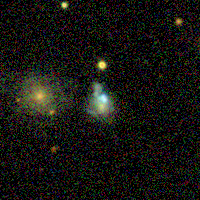

In [11]:
img

In [10]:
#while count < maxcount:
    #query_text = f"SELECT top {chunksize} * FROM idr3.detection_image WHERE ra + dec > 200 AND RA > {maxPrev} order by RA ASC"
    #conn.query(query_text)
#query_text = f"SELECT top 20001 detection.Field, detection.ID, detection.RA, detection.DEC, detection.FWHM, detection.ISOarea, detection.KRON_RADIUS, detection.nDet_magPStotal, detection.PhotoFlagDet, u.U_PStotal, f378.F378_PStotal, f395.F395_PStotal, f410.F410_PStotal, f430.F430_PStotal, g.G_PStotal, f515.F515_PStotal, r.R_PStotal, f660.F660_PStotal, i.I_PStotal, f861.F861_PStotal, z.Z_PStotal, u.e_U_PStotal, f378.e_F378_PStotal, f395.e_F395_PStotal, f410.e_F410_PStotal, f430.e_F430_PStotal, g.e_G_PStotal, f515.e_F515_PStotal, r.e_R_PStotal, f660.e_F660_PStotal, i.e_I_PStotal, f861.e_F861_PStotal, z.e_Z_PStotal FROM idr3.detection_image as detection JOIN idr3.u_band as u ON detection.ID=u.ID JOIN idr3.f378_band as f378 ON detection.ID=f378.ID JOIN idr3.f395_band as f395 ON detection.ID=f395.ID JOIN idr3.f410_band as f410 ON detection.ID=f410.ID JOIN idr3.f430_band as f430 ON detection.ID=f430.ID JOIN idr3.g_band as g ON detection.ID=g.ID JOIN idr3.f515_band as f515 ON detection.ID=f515.ID JOIN idr3.r_band as r ON detection.ID=r.ID JOIN idr3.f660_band as f660 ON detection.ID=f660.ID JOIN idr3.i_band as i ON detection.ID=i.ID JOIN idr3.f861_band as f861 ON detection.ID=f861.ID JOIN idr3.z_band as z ON detection.ID=z.ID WHERE R_PStotal <= 16.0 AND e_U_PStotal <= 0.2 AND e_F378_PStotal <= 0.2 AND e_F395_PStotal <= 0.2 AND e_F410_PStotal <= 0.2 AND e_F430_PStotal <= 0.2 AND e_G_PStotal <= 0.2 AND e_F515_PStotal <= 0.2 AND e_R_PStotal <= 0.2 AND e_F660_PStotal <= 0.2 AND e_I_PStotal <= 0.2 AND e_F861_PStotal <= 0.2 AND e_Z_PStotal <= 0.2 AND FWHM < 7.0" 
#results = conn.query(query_text)